# Project1

## Step 1
Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import hvplot.pandas
import holoviews

from scipy.stats import linregress

# from api_keys import geoapify_key

In [2]:
# Load the CSV file
df=pd.read_csv("./Resources/Kaggle/Student Loan Debt by School 2020-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42740 entries, 0 to 42739
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  42740 non-null  int64  
 1   OPE ID                 42740 non-null  int64  
 2   School                 42740 non-null  object 
 3   City                   33650 non-null  object 
 4   State                  40700 non-null  object 
 5   Zip Code               33650 non-null  float64
 6   School Type            42740 non-null  object 
 7   Loan Type              42740 non-null  object 
 8   Recipients             42740 non-null  float64
 9   # of Loans Originated  42740 non-null  float64
 10  $ of Loans Originated  42740 non-null  float64
 11  # of Disbursements     42740 non-null  float64
 12  $ of Disbursements     42740 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 4.2+ MB


In [3]:
# Change data type and rename columns
df['Zip Code'] = df['Zip Code'].fillna(-1).astype(int).astype(str).replace('-1', 'NaN')
df['Recipients'] = df['Recipients'].astype(int)
df['# of Loans Originated'] = df['# of Loans Originated'].astype(int)
df['# of Disbursements'] = df['# of Disbursements'].astype(int)
#remove 'total'
df=df[(df['Loan Type']!='Total')&(df['Recipients']!=0)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13971 entries, 0 to 21254
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  13971 non-null  int64  
 1   OPE ID                 13971 non-null  int64  
 2   School                 13971 non-null  object 
 3   City                   11493 non-null  object 
 4   State                  13283 non-null  object 
 5   Zip Code               13971 non-null  object 
 6   School Type            13971 non-null  object 
 7   Loan Type              13971 non-null  object 
 8   Recipients             13971 non-null  int32  
 9   # of Loans Originated  13971 non-null  int32  
 10  $ of Loans Originated  13971 non-null  float64
 11  # of Disbursements     13971 non-null  int32  
 12  $ of Disbursements     13971 non-null  float64
dtypes: float64(2), int32(3), int64(2), object(6)
memory usage: 1.3+ MB


In [4]:
# df.head(10)
df.tail(10)

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
21173,21173,42404,UNIVERSIDAD ANA G. MÉNDEZ - ONLINE CAMPUS,NaN,PR,NaN,Private-Nonprofit,Grad Plus,6,6,65635.0,6,32818.0
21192,21192,42445,NORWICH UNIVERSITY OF THE ARTS,NORWICH,NaN,0,Foreign-Public,Grad Plus,1,1,21111.0,1,7037.0
21217,21217,2532,MONTANA STATE UNIVERSITY BOZEMAN,BOZEMAN,MT,59717,Public,Grad Plus,84,86,818532.0,86,408021.0
21224,21224,42509,INTER AMERICAN UNIVERSITY OF PUERTO RICO - SCH...,NaN,PR,NaN,Private-Nonprofit,Grad Plus,315,319,3817123.0,320,1911809.0
21225,21225,42510,INTER AMERICAN UNIVERSITY OF PUERTO RICO - SCH...,NaN,PR,NaN,Private-Nonprofit,Grad Plus,73,73,757500.0,73,384750.0
21226,21226,42518,GRADUATE INSTITUTE OF INTERNATIONAL AND DEVELO...,GENEVA,NaN,0,Foreign-Private,Grad Plus,12,12,108260.0,12,54130.0
21236,21236,42542,INTER AMERICAN UNIVERSITY OF PUERTO RICO SAN G...,SAN GERMAN,PR,683,Private-Nonprofit,Grad Plus,1,1,18000.0,1,9000.0
21249,21249,42571,UNIVERSITEIT MAASTRICHT,MAASTRICHT,NaN,0,Foreign-Public,Grad Plus,3,3,33482.0,3,16741.0
21252,21252,42580,SEATTLE FILM INSTITUTE,SEATTLE,WA,98119,Proprietary,Grad Plus,2,2,42606.0,2,14202.0
21254,21254,42595,UNIVERSITY OF THE WEST OF SCOTLAND,PAISLEY,NaN,0,Foreign-Public,Grad Plus,3,3,35031.0,3,11679.0


In [5]:
df.describe()

,index,OPE ID,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
count,13971.000000,13971.000000,13971.000000,13971.000000,1.397100e+04,13971.000000,1.397100e+04
mean,8501.482142,13447.513349,501.051965,514.481497,3.904231e+06,522.935080,1.955419e+06
std,5619.006018,14640.381330,1235.290701,1272.874414,1.021313e+07,1297.914024,5.189711e+06
min,0.000000,1002.000000,1.000000,1.000000,1.560000e+02,1.000000,1.560000e+02
25%,3769.500000,2517.000000,11.000000,11.000000,6.618300e+04,12.000000,3.262500e+04
50%,7532.000000,3969.000000,80.000000,81.000000,6.052340e+05,84.000000,2.950110e+05
75%,13660.500000,23307.000000,458.000000,471.000000,3.128124e+06,480.000000,1.544399e+06
max,21254.000000,42933.000000,26663.000000,27261.000000,2.586015e+08,27261.000000,1.085654e+08


## Step 2
### Ask the questions

State, What is the breakdown of number of collages in each state? P

State, What is the breakdown of recipients of Student Loans by State (by quantity and by $)?P

State, What states have the most (public schools? Private schools?) recipients?P

State, What are the top 10 states with the most student loans?L

Geographic, How does the average student loan vary by zip code?M

Geographic, Are there trends based on geographic region or type of school?T

In [6]:
# get US, none zero data
drop_df= df[(df['Zip Code']!='NaN')&(df['Zip Code']!='0')]

# drop_df.to_csv('./Output/test.csv')
drop_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11471 entries, 0 to 21252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  11471 non-null  int64  
 1   OPE ID                 11471 non-null  int64  
 2   School                 11471 non-null  object 
 3   City                   11471 non-null  object 
 4   State                  11471 non-null  object 
 5   Zip Code               11471 non-null  object 
 6   School Type            11471 non-null  object 
 7   Loan Type              11471 non-null  object 
 8   Recipients             11471 non-null  int32  
 9   # of Loans Originated  11471 non-null  int32  
 10  $ of Loans Originated  11471 non-null  float64
 11  # of Disbursements     11471 non-null  int32  
 12  $ of Disbursements     11471 non-null  float64
dtypes: float64(2), int32(3), int64(2), object(6)
memory usage: 1.1+ MB


In [7]:
# # create zipwithLL.csv
# zip_df=pd.read_csv("./Resources/Zipcode/uszips.csv")
# zip_df['Full Zip Code']= zip_df['Zip Code'].astype(str).str.zfill(5)
# zip_df['Zip Code']=zip_df['Zip Code'].astype(str)
# zip_df.tail(10)


# base_url='https://api.geoapify.com/v1/geocode/search?'
# params = {
    
#     "apiKey": geoapify_key,
#     "type":"postcode",
#     'format':'json',
#     'country':'USA'
# }


# for index, row in zip_df.iterrows():

#     params["text"] = row['Full Zip Code']
#     params["city"] = row['City']
#     params["state"] = row['State']
#     if pd.isnull(row['Lat']):

#         LL = requests.get(base_url, params=params)

#     # Convert the API response to JSON format
#         LL = LL.json()
            
#         try:
#             # print(row['Full Zip Code'])         
#             # print(LL["results"][0]["lat"])
#             # print(LL["results"][0]["lon"])
#             zip_df.loc[index, "Lat"] = LL["results"][0]["lat"]
#             zip_df.loc[index, "Lng"] = LL["results"][0]["lon"]
#         except (KeyError, IndexError):
#             params.pop("text")
#             params.pop("type")
#             LL = requests.get(base_url, params=params)
#             # print(params)
#             LL = LL.json()
#             # print(json.dumps(LL,indent=4))
#             zip_df.loc[index, "Lat"] = LL["results"][0]["lat"]
#             zip_df.loc[index, "Lng"] = LL["results"][0]["lon"]
# zip_df.to_csv('./Output/zipwithLL.csv',index=False)


In [8]:
zip_df=pd.read_csv("./Output/zipwithLL.csv")
zip_df['Full Zip Code']= zip_df['Zip Code'].astype(str).str.zfill(5)
zip_df['Zip Code']=zip_df['Zip Code'].astype(str)
drop_LL_df=pd.merge(drop_df,zip_df,how="left",on='Zip Code')

In [9]:
drop_LL_df
drop_LL_df.to_csv('./Output/drop_LL_df-check.csv',index=False)


In [10]:
lat_center = 39.116931
lng_center = -102.077978
delta = 30

map_plot = drop_LL_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = '$ of Loans Originated',
    # scale = 0.003, for $
    # scale = 0.5, for r
    scale = 0.002,
    color = 'State_y',
    hover_cols=['School','City_y','State_y'],
    xlim=(lng_center - delta, lng_center + delta),
    ylim=(lat_center - delta, lat_center + delta)

)

e:\ProgramData\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [11]:

# holoviews.ipython.show_traceback()
hvplot.save(map_plot, './Output/TCmapplot.png', fmt='png')
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (State_y,$ of Loans Originated,School,City_y)

In [12]:
regions = {
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'Midwest': ['OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'OK', 'TX', 'AR', 'LA'],
    'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
}

In [13]:
Locations = {
    'Foreign': ['Foreign-Private', 'Foreign-Public', 'Foreign-For-Profit'],
    'US': ['Public', 'Private-Nonprofit', 'Proprietary']
}


In [14]:
def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'International'

In [15]:
def Locationss(Location):
    for region, states in Locations.items():
        if Location in states:
            return region
    return 'Other'

In [16]:
df['Region'] = df['State'].apply(assign_region)
df['Location']= df['School Type'].apply(Locationss)
# df

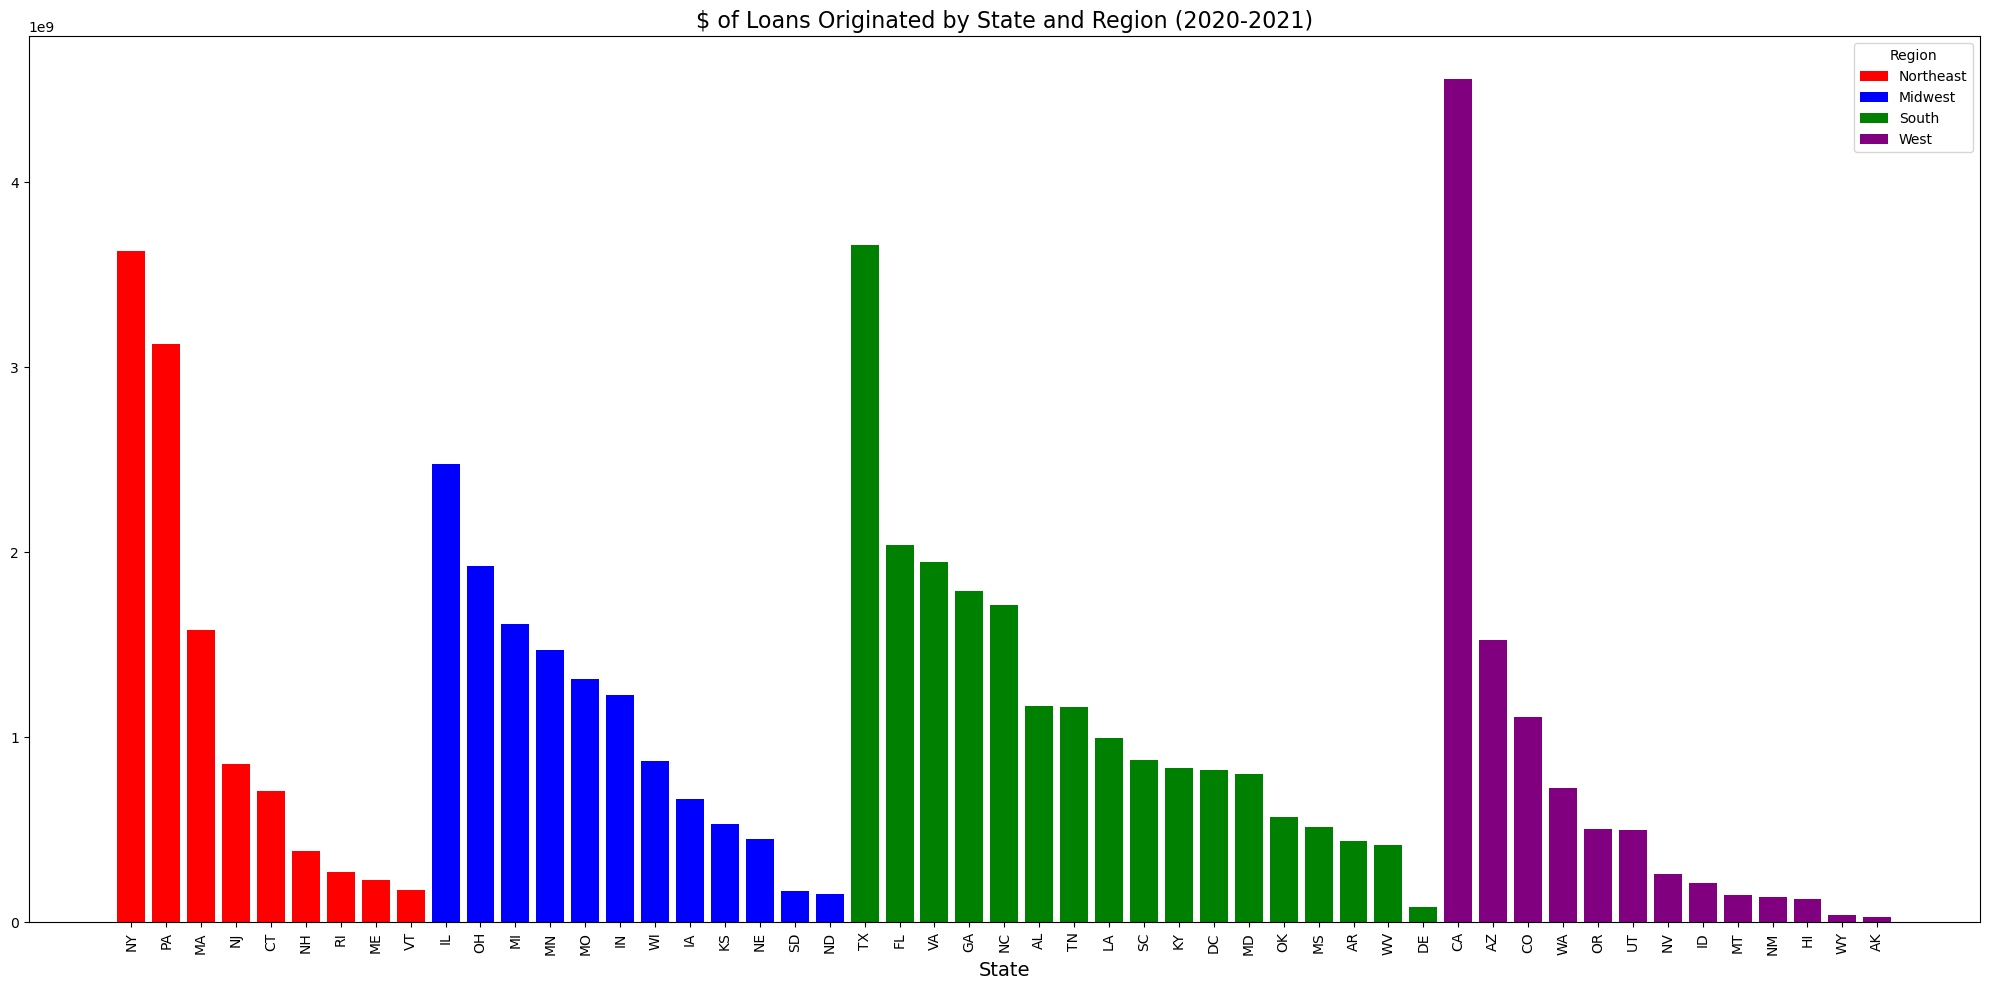

In [17]:
regions_list= [
    'Northeast',
    'Midwest',
    'South',
    'West',
    'International'
]
# # sort them
state_total_loans = df.groupby(['State'])['$ of Loans Originated'].sum().reset_index()
state_total_loans = state_total_loans.sort_values(by='$ of Loans Originated', ascending=False)
state_total_loans['Region'] = state_total_loans['State'].apply(assign_region)


plt.figure(figsize=(20, 10))
for region, color in zip(regions.keys(), ['red', 'blue', 'green', 'purple']):
    subset = state_total_loans[state_total_loans['Region'] == region]
    plt.bar(subset['State'], subset['$ of Loans Originated'], label=region, color=color)

plt.title('$ of Loans Originated by State and Region (2020-2021)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.legend(title='Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("./Output/TCmapplot1.png")
plt.show()

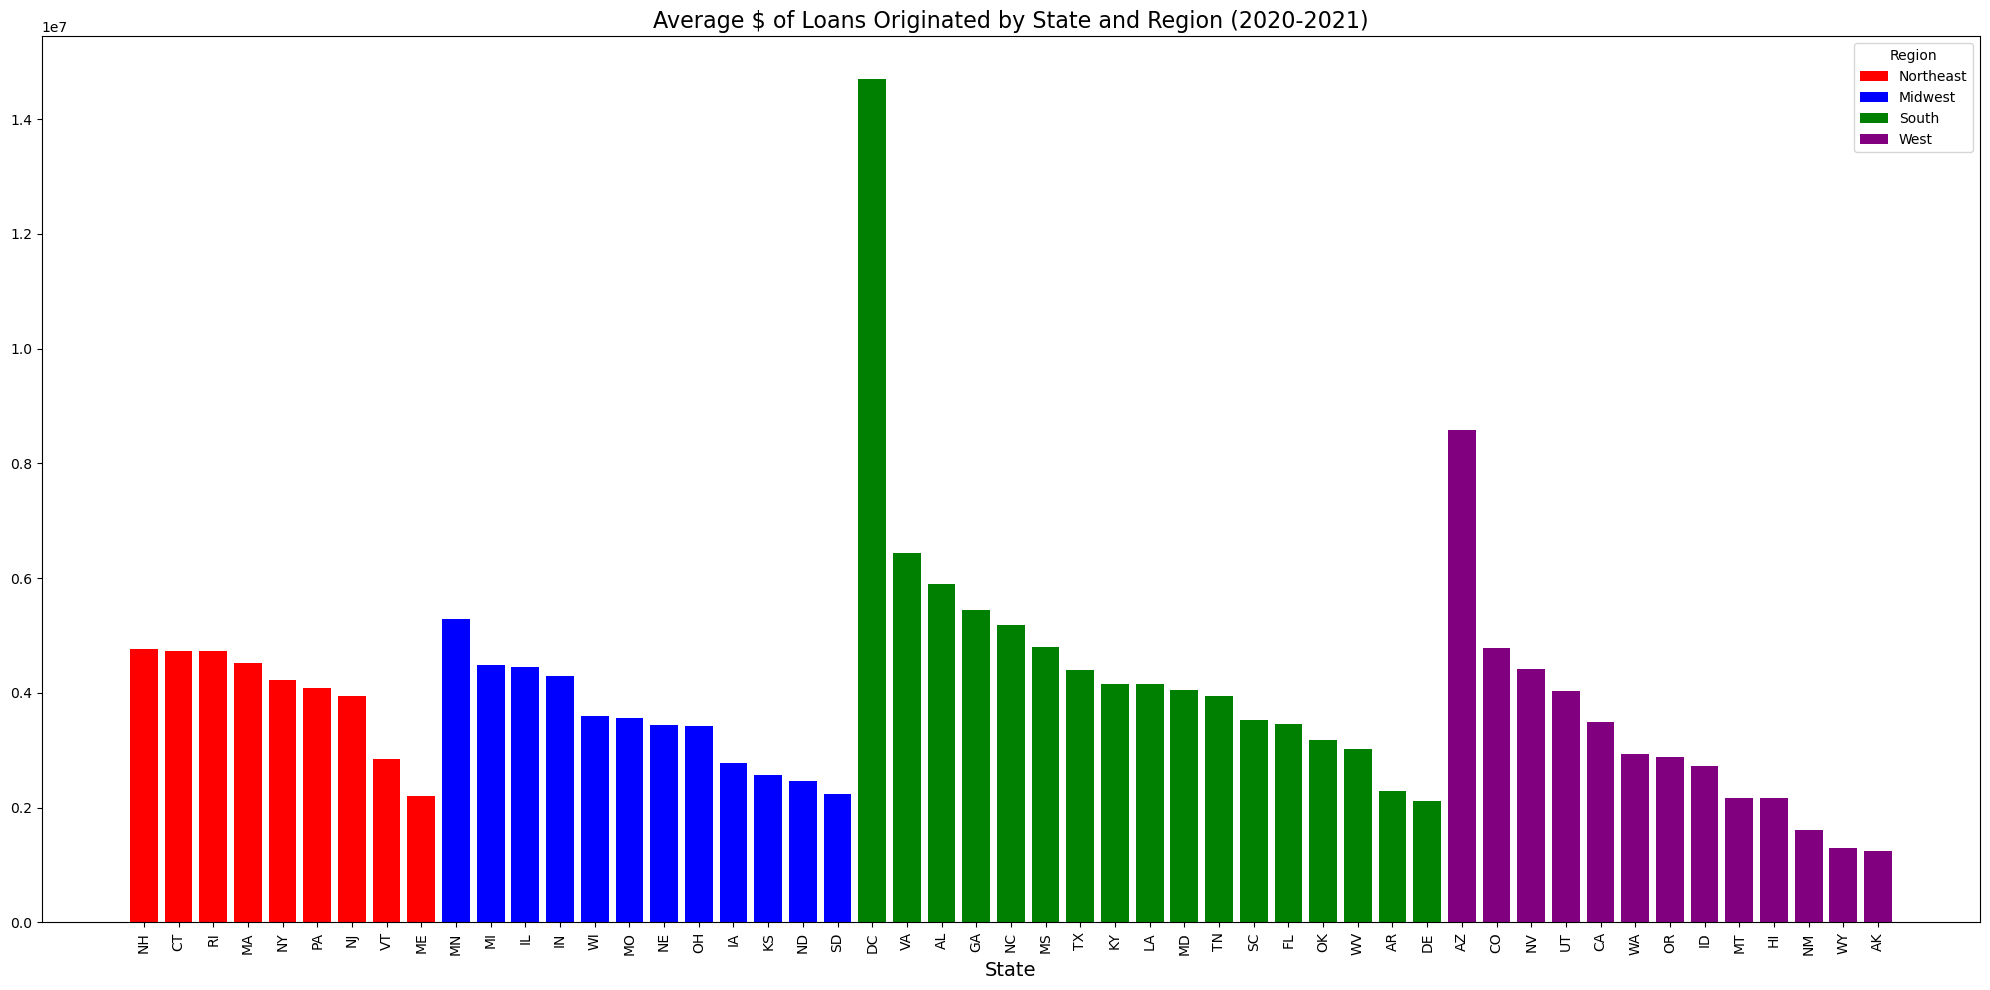

In [18]:
regions_list= [
    'Northeast',
    'Midwest',
    'South',
    'West',
    'International'
]
# # sort them
state_total_loans = df.groupby(['State'])['$ of Loans Originated'].mean().reset_index()
state_total_loans = state_total_loans.sort_values(by='$ of Loans Originated', ascending=False)
state_total_loans['Region'] = state_total_loans['State'].apply(assign_region)


plt.figure(figsize=(20, 10))
for region, color in zip(regions.keys(), ['red', 'blue', 'green', 'purple']):
    subset = state_total_loans[state_total_loans['Region'] == region]
    plt.bar(subset['State'], subset['$ of Loans Originated'], label=region, color=color)

plt.title('Average $ of Loans Originated by State and Region (2020-2021)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.legend(title='Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("./Output/TCmapplot4.png")
plt.show()

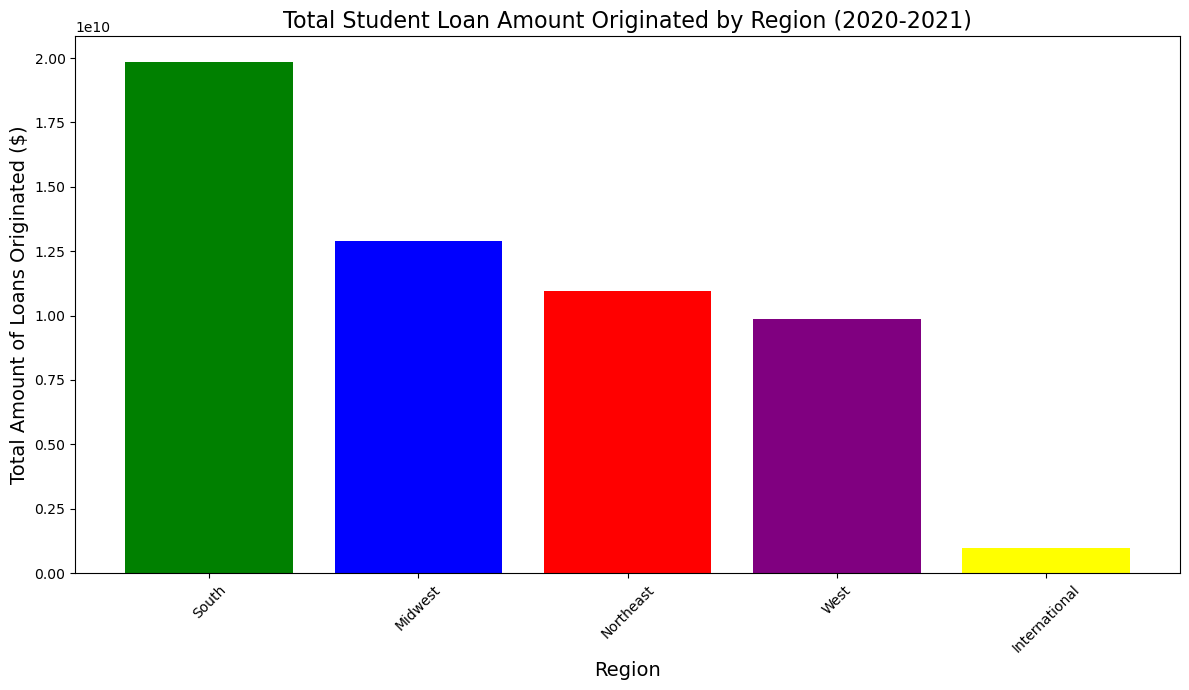

In [19]:
region_total_loan = df.groupby('Region')['$ of Loans Originated'].sum().reset_index()
region_total_loan = region_total_loan.sort_values(by='$ of Loans Originated', ascending=False)
# Plotting the total distribution bar chart by region
plt.figure(figsize=(12, 7))
plt.bar(region_total_loan['Region'], region_total_loan['$ of Loans Originated'], color=['green', 'blue', 'red', 'purple','yellow'])

plt.title('Total Student Loan Amount Originated by Region (2020-2021)', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Amount of Loans Originated ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./Output/TCmapplot2.png")
plt.show()

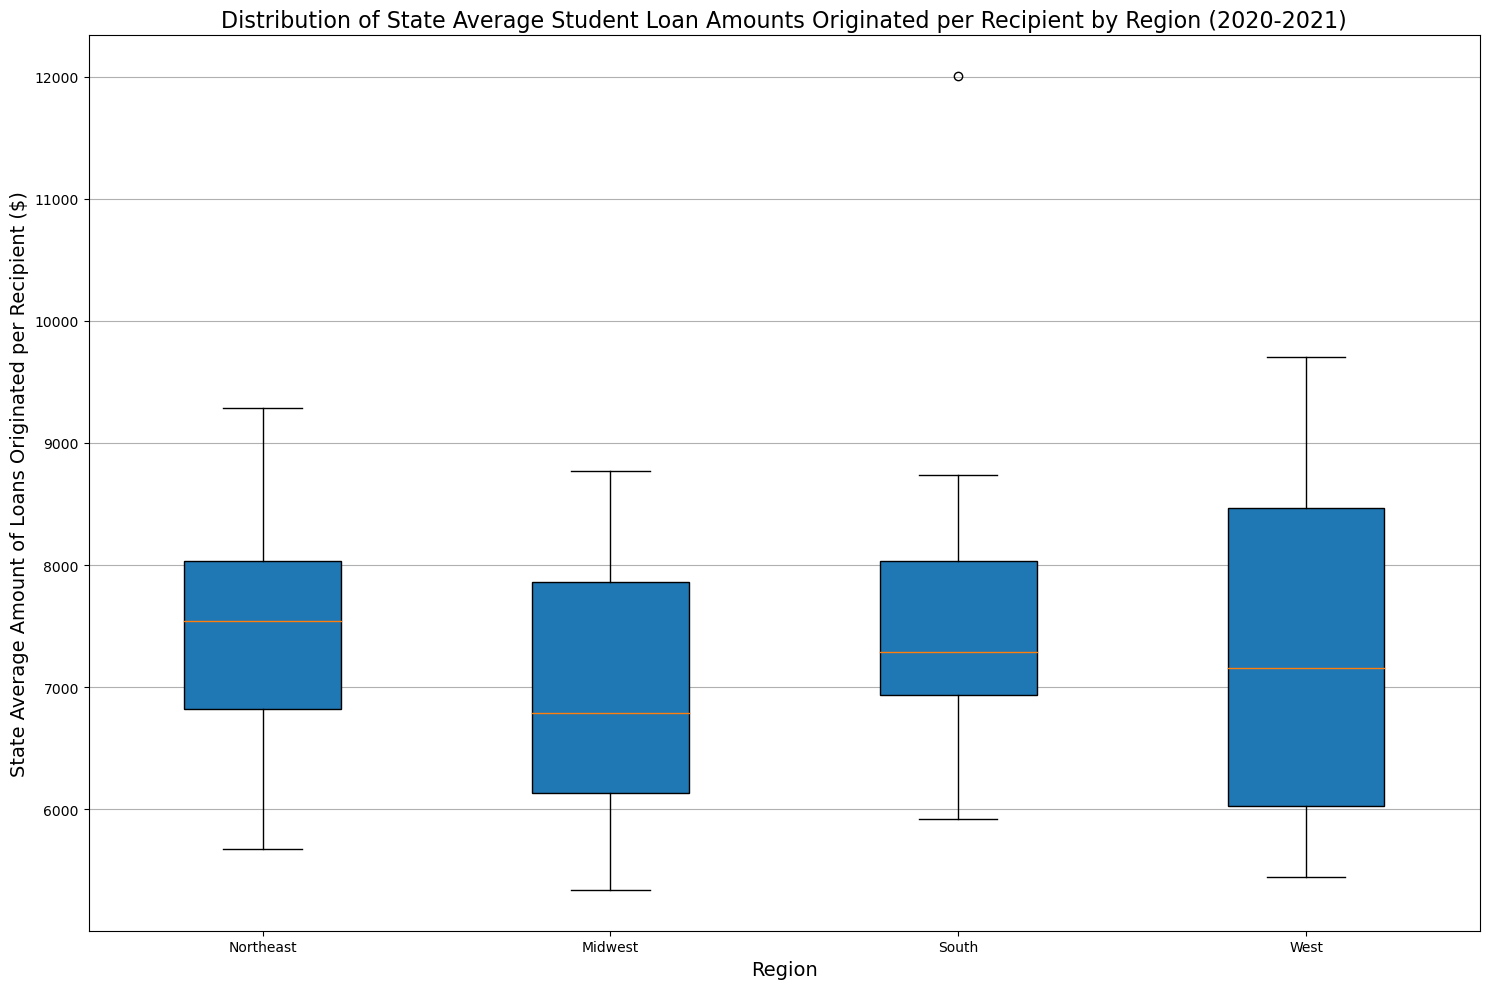

In [20]:
plt.figure(figsize=(15, 10))
# df['Avg df per Recipient']=df['$ of Loans Originated']/df['Recipients']
# Extract data for each region and plot
data_to_plot_avg= df.groupby('State')[['$ of Loans Originated','Recipients']].sum().reset_index()
data_to_plot_avg['Region'] = data_to_plot_avg['State'].apply(assign_region)
data_to_plot_avg['Avg df per Recipient']=data_to_plot_avg['$ of Loans Originated']/data_to_plot_avg['Recipients']
data_to_plot_avg_cleaned = [data_to_plot_avg[data_to_plot_avg['Region'] == region]['Avg df per Recipient'] for region in regions.keys()]

# Plotting the boxplot
plt.boxplot(data_to_plot_avg_cleaned, vert=True, patch_artist=True, labels=regions.keys())

plt.title('Distribution of State Average Student Loan Amounts Originated per Recipient by Region (2020-2021)', fontsize=16)
plt.ylabel('State Average Amount of Loans Originated per Recipient ($)', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("./Output/TCmapplot3.png")
plt.show()

In [21]:
data_to_plot_avg_cleaned_df=data_to_plot_avg[['State','Avg df per Recipient']]
data_to_plot_avg_cleaned_df.describe()

,Avg df per Recipient
count,54.000000
mean,7403.442806
std,1467.897966
min,3399.564103
25%,6690.146523
50%,7158.969523
75%,8262.893456
max,12004.630257


Loan Type, What is the breakdown of type of student loan  (subsidized, unsubsidized, grad plus, parent plus, etc.)?M

School Type, What is the breakdown of student loan quantity/$ by school type (for profit, non-profit, public, etc.)?L

<!-- VS, What is the breakdown in disbursements versus loan origination $ amounts? -->

<!-- VS, Which schools have the highest disparity between loans originated and loans disbursed? -->

Foreign university, VS US

More datasets